In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv('../DATA/data.csv')
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].apply(lambda x:x.toordinal())

<Axes: >

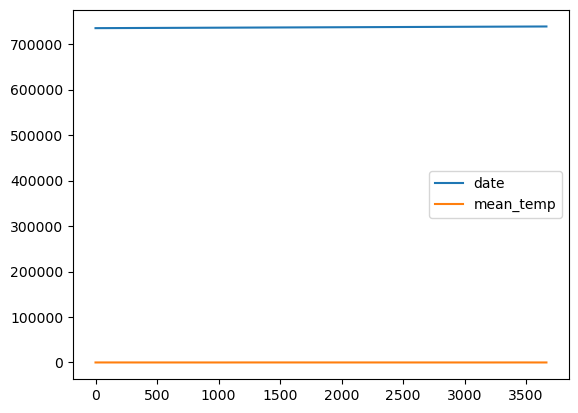

In [3]:
data[["date", "mean_temp"]].plot()

In [4]:
model=ARIMA(data['mean_temp'],order=(1,1,1))
model_fit=model.fit()

<Axes: >

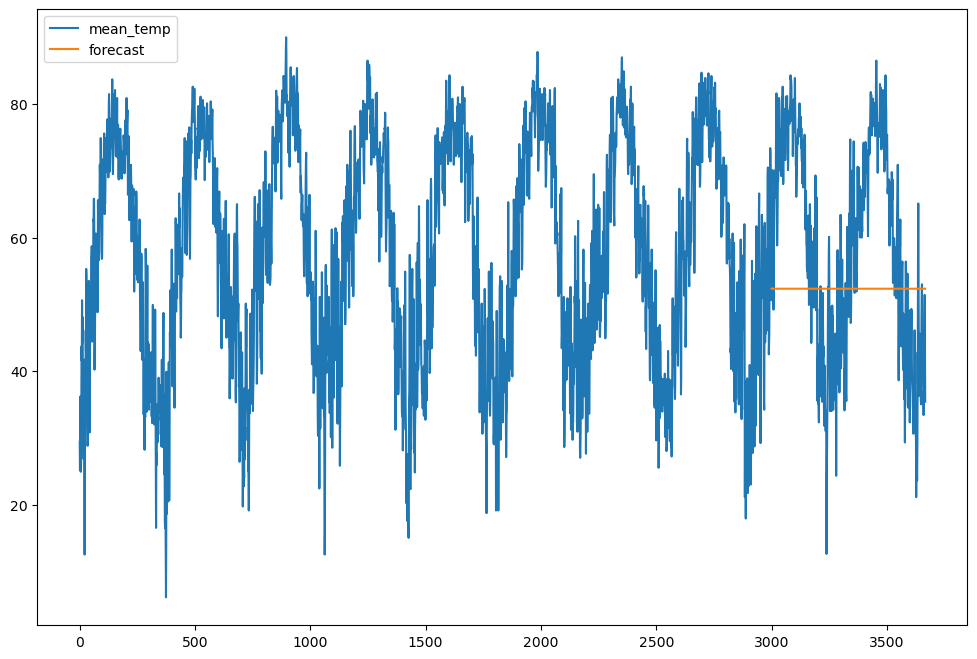

In [5]:
data['forecast']=model_fit.predict(start=3000,dynamic=True)
data[['mean_temp','forecast']].plot(figsize=(12,8))

In [6]:
model=sm.tsa.statespace.SARIMAX(data['mean_temp'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: >

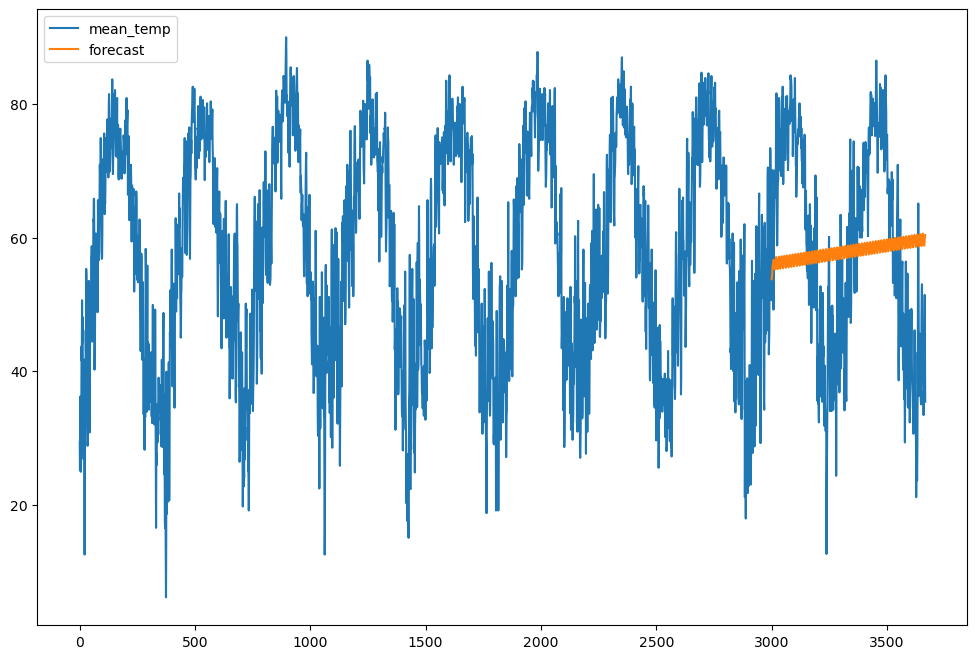

In [47]:
data['forecast']=results.predict(start=3000,dynamic=True)
data[['mean_temp','forecast']].plot(figsize=(12,8))

1. Check to see if the time series is stationary 
2. AR (p) + I (d) + MA (q) 
   1. AR: auto regressive (p): number of past values included in the AR model 
   2. I: integrated: you can make the time series stationary by differencing 
   3. MA: moving average (q): the number of past forecast errors included in the MA model 

## Splitting to Training and Test

In [59]:
split = (data.index < len(data)-365)
train = data[split].copy()
test = data[~split].copy()

## Check for Stationary Time Series 

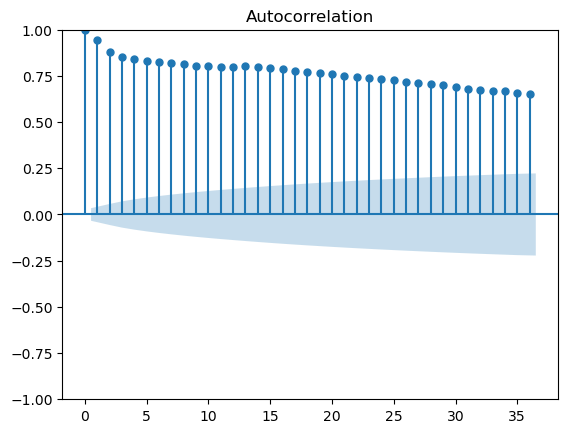

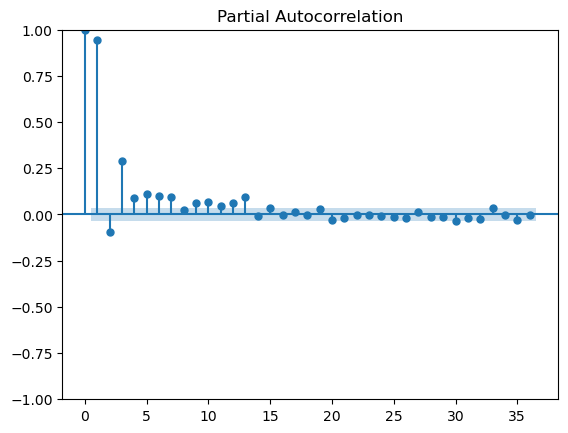

In [60]:
# correlation of the time series with its lags 
acf_original = plot_acf(train['mean_temp'])

# shows the partial correlation with its lags
pcaf_original = plot_pacf(train['mean_temp'])

In [63]:
# adf test 
adf_test = adfuller(train['mean_temp'])
adf_test[1]

0.009153997583478703

The time series appears to be stationary. \
Hypothesis for stationary time series: \
Ho = non-stationary \
Ha = stationary \
p value < 0.05 meaning we reject the null hypothesis

this means we can use 1 as the d parameter

## Picking p and q values for ARIMA
since the PACF plot has a significant spike at lag p, but not beyond and the ACF plot decays gradually, this suggests we use a p,d,0 model \
 \
since the last significant spike is at 3, we will use
ARIMA(3,1,0)

## Using ARIMA
### Fitting the model 

In [122]:
model = ARIMA(train['mean_temp'], order=[3,0,1], seasonal_order=(3, 0, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

### Checking We have Enough Information

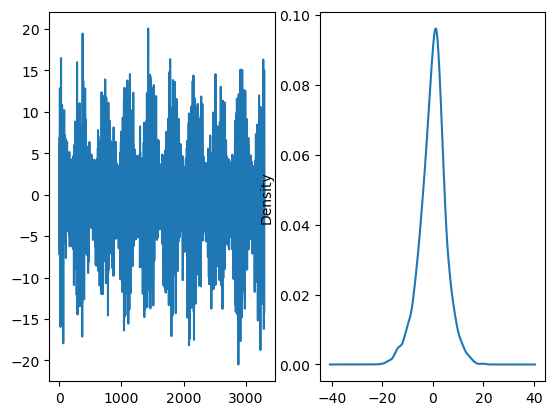

In [115]:
## we need to make sure the model has enough information on the data, 
# so we need to look at the residuals

residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(ax=ax[0])
residuals.plot(kind='kde', ax=ax[1])
plt.show()

density is normally distributed around 0

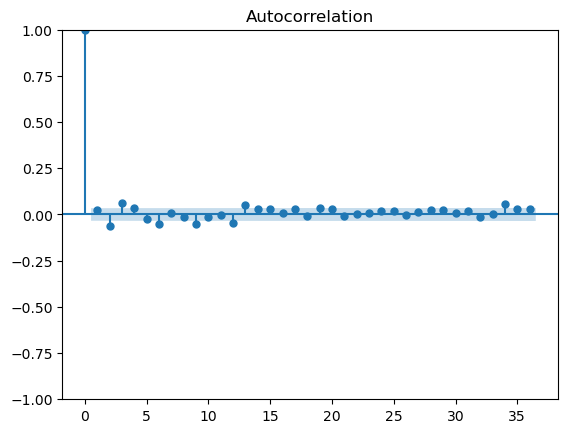

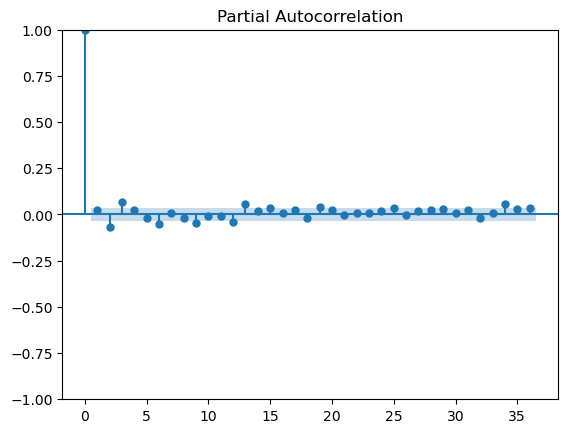

In [116]:
# correlation of the time series with its lags 
acf_original = plot_acf(residuals)

# shows the partial correlation with its lags
pcaf_original = plot_pacf(residuals)

so significant lags 

### Predicting

<Axes: >

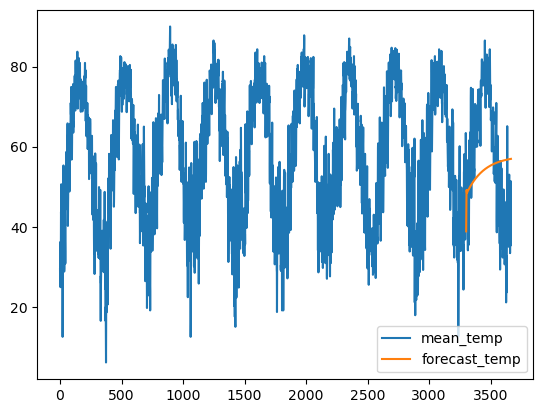

In [121]:
forecast_temp = model_fit.forecast(len(test['mean_temp']))
data['forecast_temp'] = [None]*len(train)+list(forecast_temp)
data[['mean_temp', 'forecast_temp']].plot()

In [ ]:
forecast_temp = model_fit.forecast(len(test['mean_temp']))
data['forecast_temp'] = [None]*len(train)+list(forecast_temp)
data[['mean_temp', 'forecast_temp']].plot()

In [113]:
import pmdarima as pm 
auto_arima = pm.auto_arima(train['mean_temp'])
auto_arima

ARIMA(order=(4, 0, 4), scoring_args={}, suppress_warnings=True)